# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [3]:
data = pd.read_csv('../data/airplane_passengers_monthly.csv', encoding='unicode_escape', sep=';', header=None).drop(0, axis=1)
data.columns = ['str_date', 'passengers']

In [4]:
data['month'] = data['str_date'].apply(lambda x: int(x.split('M')[1]))
data['year'] = data['str_date'].apply(lambda x: int(x.split('M')[0]))
data = data[['year', 'month', 'passengers']]

# Monthly departures

In [5]:
mean_monthly = pd.DataFrame(data.groupby(['month'])['passengers'].mean()).reset_index()

In [6]:
mean_monthly['mean_subtracted_passengers']=(mean_monthly['passengers']-mean_monthly['passengers'].mean())

<BarContainer object of 12 artists>

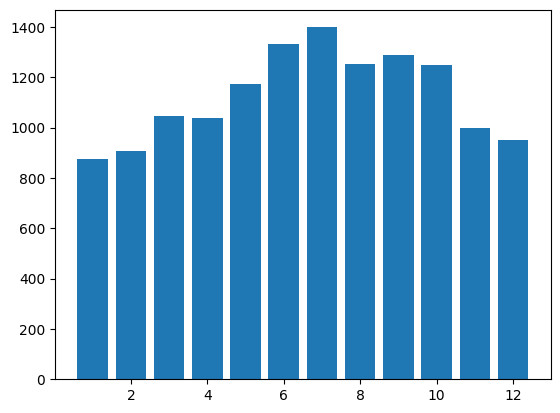

In [7]:
plt.bar(mean_monthly['month'], mean_monthly['passengers'])

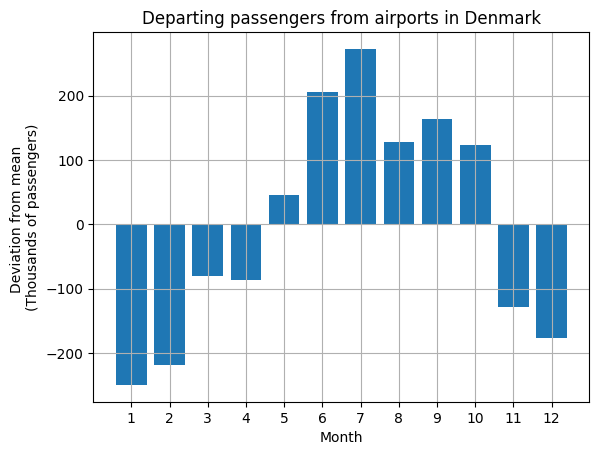

In [8]:
plt.bar(mean_monthly['month'], mean_monthly['mean_subtracted_passengers'])
plt.xlabel('Month')
plt.ylabel('Deviation from mean \n(Thousands of passengers)')
plt.xticks(np.arange(1,13))
plt.title('Departing passengers from airports in Denmark')
plt.grid()
plt.show()

/var/folders/_6/l3776shn2kq8j4f7hm3qr5bh0000gn/T/ipykernel_24733/392891864.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick * 1000):,}" for tick in yticks])  # comma formatting


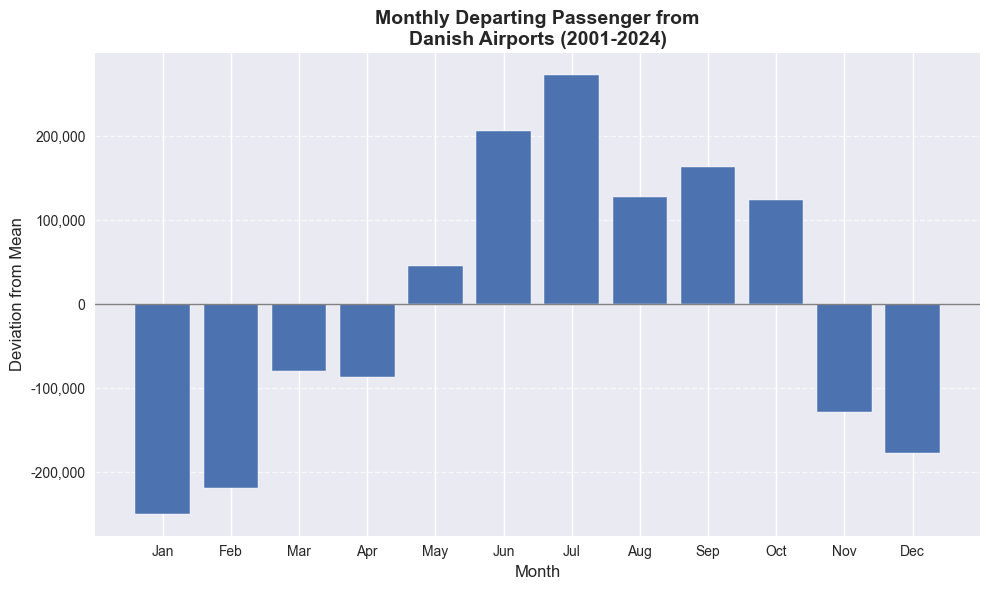

In [ ]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')  # optional, gives a cleaner grid style

# Create the bar plot
plt.bar(mean_monthly['month'], mean_monthly['mean_subtracted_passengers'], edgecolor='white') # color='red'

# Title and axis labels with improved formatting
plt.title('Monthly Departing Passenger from\nDanish Airports (2001-2024)', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Deviation from Mean', fontsize=12)

# Set x-axis ticks
plt.xticks(np.arange(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           fontsize=10)

# yticks
ax = plt.gca()
yticks = ax.get_yticks()
ax.set_yticklabels([f"{int(tick * 1000):,}" for tick in yticks])  # comma formatting

# Add grid lines only on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: add horizontal line at y=0 for reference
plt.axhline(0, color='gray', linewidth=1)

# Tight layout for spacing
plt.tight_layout()

# Show plot
plt.show()

/var/folders/_6/l3776shn2kq8j4f7hm3qr5bh0000gn/T/ipykernel_24733/855043757.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick * 1000):,}" for tick in yticks])  # Comma formatting for thousands


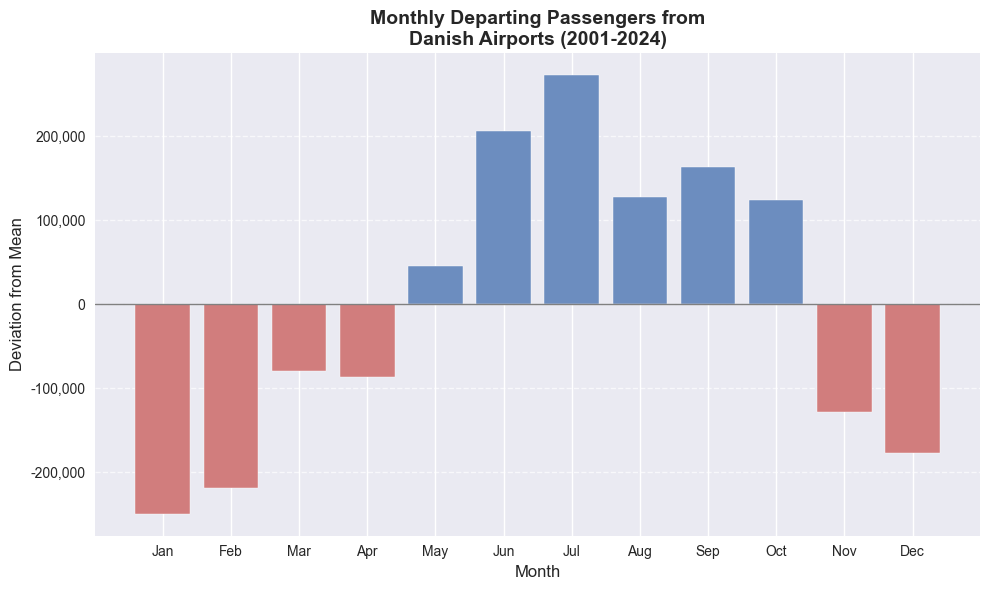

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')  # Clean grid style

# Set up color gradient from red to green based on values
positive_color = '#6c8dbf'  # Dusty Blue
negative_color = '#d17d7d'  # Dusty Red

colors = [positive_color if x > 0 else negative_color for x in mean_monthly['mean_subtracted_passengers']]

# Create the bar plot with color gradient
bars = plt.bar(mean_monthly['month'], 
               mean_monthly['mean_subtracted_passengers'], 
               edgecolor='white', color=colors)

# Title and axis labels with better formatting
plt.title('Monthly Departing Passengers from\nDanish Airports (2001-2024)', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Deviation from Mean', fontsize=12)

# Set x-axis ticks with improved readability
plt.xticks(np.arange(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           fontsize=10)

# Format y-axis with commas
ax = plt.gca()
yticks = ax.get_yticks()
ax.set_yticklabels([f"{int(tick * 1000):,}" for tick in yticks])  # Comma formatting for thousands

# Add subtle grid lines only on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Add a horizontal line at y=0 for reference
plt.axhline(0, color='gray', linewidth=1)

# Tight layout for better spacing
plt.tight_layout()

# Save and show plot
plt.savefig('../assets_own/popular_months.png')
plt.show()


# Trend across time

In [10]:
data['day'] = 1
data['date'] = pd.to_datetime(data[['day', 'month', 'year']])

/var/folders/_6/l3776shn2kq8j4f7hm3qr5bh0000gn/T/ipykernel_24733/4224366931.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick * 1000):,}" for tick in yticks])  # comma formatting


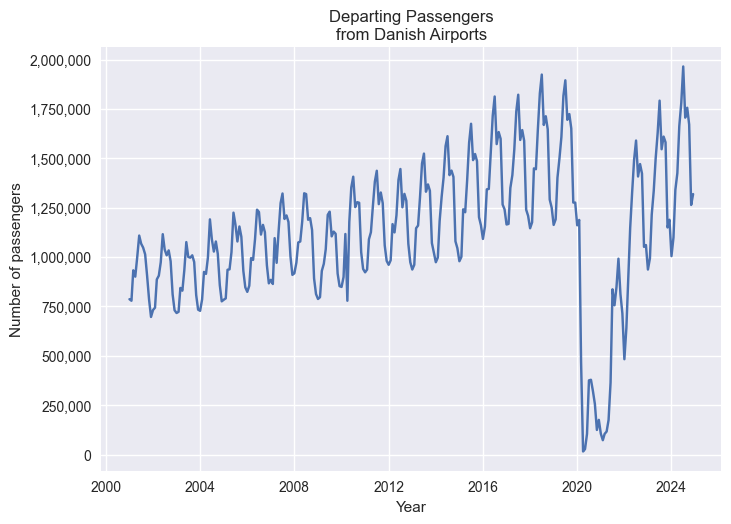

In [13]:
plt.plot(data['date'], data['passengers'])
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.title('Departing Passengers\nfrom Danish Airports')
# yticks
ax = plt.gca()
yticks = ax.get_yticks()
ax.set_yticklabels([f"{int(tick * 1000):,}" for tick in yticks])  # comma formatting
plt.savefig('../assets_own/departing_passengers.png')
plt.show()

An increase in flight across time from 2001. A fall during the corona virus. 
Annotation could be used here.

/var/folders/_6/l3776shn2kq8j4f7hm3qr5bh0000gn/T/ipykernel_24733/918679374.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick):,}" for tick in yticks])  # Adjusted for actual passenger values


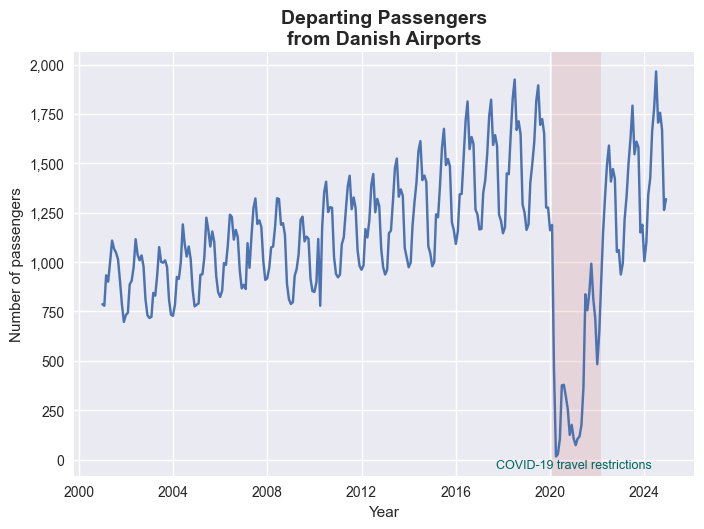

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


# Your existing plot code
plt.plot(data['date'], data['passengers'])
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.title('Departing Passengers\nfrom Danish Airports', fontsize=14, weight='bold')

# Format y-axis ticks (comma-separated thousands)
ax = plt.gca()
yticks = ax.get_yticks()
ax.set_yticklabels([f"{int(tick):,}" for tick in yticks])  # Adjusted for actual passenger values

# COVID-19 annotation (March 2020 - March 2022)
covid_start = '2020-02'
covid_end = '2022-03'
y_min = ax.get_ylim()[0]  # Bottom of the plot

# Add colored span (BuGn palette, semi-transparent)
ax.axvspan(covid_start, covid_end, color='#d17d7d', alpha=0.2, lw=0)

# Add label just above x-axis
label_y = y_min + (ax.get_ylim()[1] - y_min) * 0.01  # 2% above bottom
label_x = datetime(2021, 1, 1)  # January 2021 as datetime object
ax.text(label_x, label_y, 'COVID-19 travel restrictions', 
        ha='center', va='bottom', color='#01665e', fontsize=9)

plt.savefig('../assets_own/departing_passengers.png')
plt.show()